In [427]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
maunaloa = pd.read_csv("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt",
                       skiprows=49, header=None, delim_whitespace=True,
                       names=["year", "month", "day", "year_decimal", "co2", "days", "1 yr ago", "10 yr ago", "since 1800"],
                       parse_dates=[[0, 1, 2]], na_values=[-999.99]
                      )

In [169]:
columns = ["year", "month", "decimal date", "average", "interpolated", "trend", "?"]
co2 = pd.read_csv("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt",
                  delim_whitespace=True, skiprows=72, names=columns, parse_dates=[[0, 1]])


In [170]:
co2.head()

,year_month,decimal date,average,interpolated,trend,?
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1


In [172]:
co2.set_index("year_month", inplace=True)

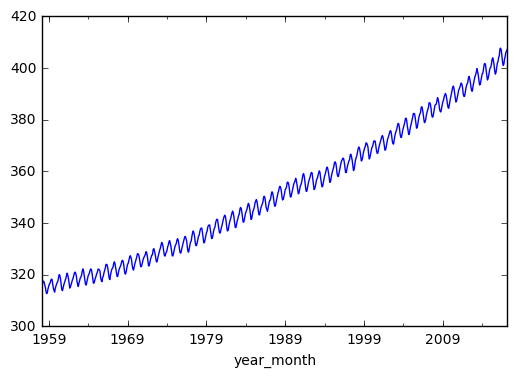

In [173]:
co2.interpolated.plot()

In [174]:
ppm = co2.interpolated

In [177]:
ppm.head()

year_month
1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.50
1958-06-01    317.10
1958-07-01    315.86
Name: interpolated, dtype: float64

In [178]:
ppm.autocorr()

0.99892081520225562

In [179]:
ppm.autocorr(lag=12)

0.99973333237787521

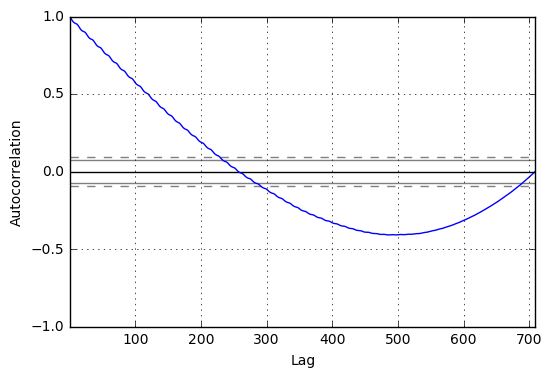

In [180]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(ppm)


In [10]:
aapl = pd.read_csv("http://ichart.finance.yahoo.com/table.csv?s=AAPL")

In [11]:
aapl.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2017-04-21,142.440002,142.679993,141.850006,142.270004,17245200,142.270004
1,2017-04-20,141.220001,142.919998,141.160004,142.440002,23251100,142.440002
2,2017-04-19,141.880005,142.000000,140.449997,140.679993,17271300,140.679993
3,2017-04-18,141.410004,142.039993,141.110001,141.199997,14660800,141.199997
4,2017-04-17,141.479996,141.880005,140.869995,141.830002,16424000,141.830002


In [12]:
aapl.set_index("Date", inplace=True)
aapl.sort_index(inplace=True)

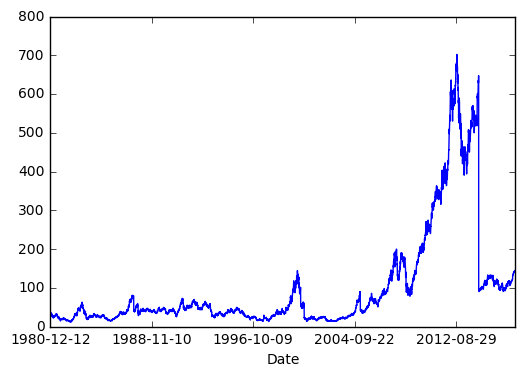

In [13]:
aapl.Close.plot()

In [14]:
goog = pd.read_csv("http://ichart.finance.yahoo.com/table.csv?s=GOOG", parse_dates=["Date"])

In [15]:
goog.set_index("Date", inplace=True)
goog.sort_index(inplace=True)

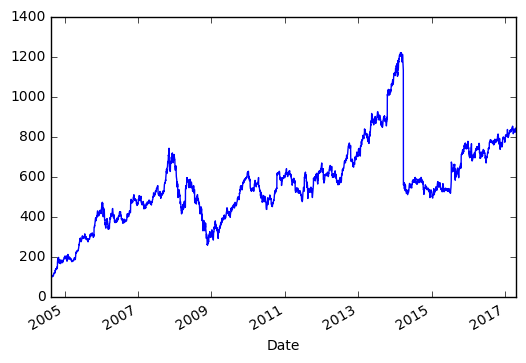

In [16]:
goog.Close.plot()

In [17]:
goog.Close.autocorr()

0.99748320458605377

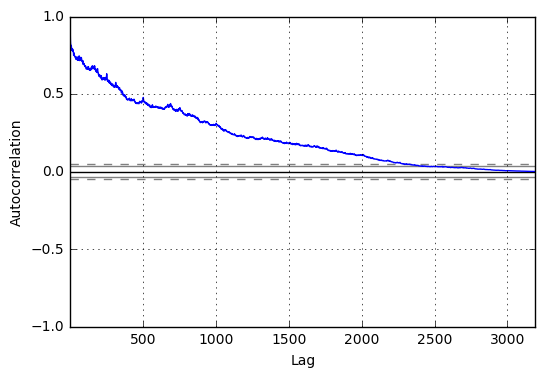

In [18]:
autocorrelation_plot(goog)


In [19]:
rm100 = goog.Close.rolling(window=100).mean()
rm10 = goog.Close.rolling(window=10).mean()

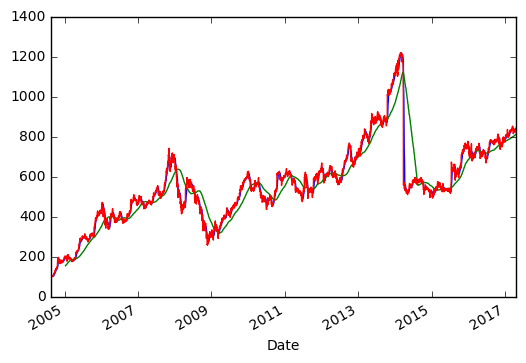

In [21]:
rm10.plot()
rm100.plot()

goog.Close.plot()

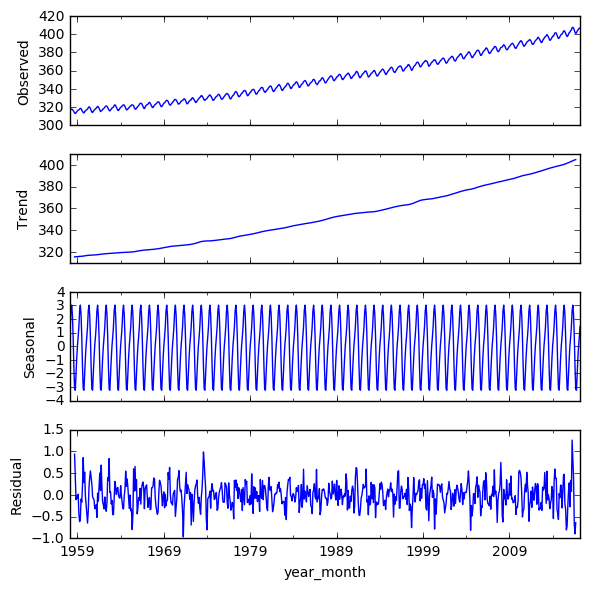

In [181]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ppm, model='additive')
fig = decomposition.plot()
fig.set_figheight(6)
fig.tight_layout()

In [182]:
ppm.shape

(709,)

In [188]:
ar_model = tsa.ar_model.AR(ppm[:500])

In [189]:
res = ar_model.fit(maxlag=12)

In [190]:
res.params

const              -2.018779
L1.interpolated     0.931758
L2.interpolated    -0.240629
L3.interpolated    -0.099048
L4.interpolated    -0.076488
L5.interpolated     0.164472
L6.interpolated    -0.000531
L7.interpolated    -0.023481
L8.interpolated    -0.125134
L9.interpolated     0.100288
L10.interpolated   -0.021266
L11.interpolated    0.414740
L12.interpolated   -0.017268
dtype: float64

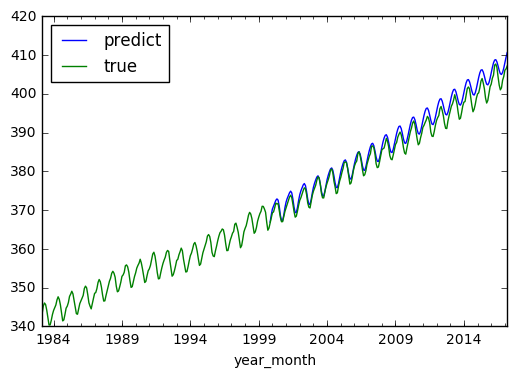

In [191]:
res.predict(ppm.index[500], ppm.index[-1]).plot(label="predict")
ppm[300:].plot(label="true")
plt.legend(loc="best")

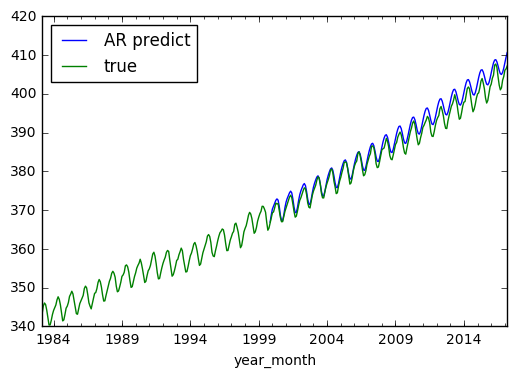

In [369]:
ar_model = tsa.ar_model.AR(ppm[:500])
res = ar_model.fit(maxlag=12)
ar_pred = res.predict(ppm.index[500], ppm.index[-1])
ar_pred.plot(label="AR predict")
ppm[300:].plot(label="true")
plt.legend(loc="best")


In [ ]:
res.predict(ppm.index[500], ppm.index[-1])

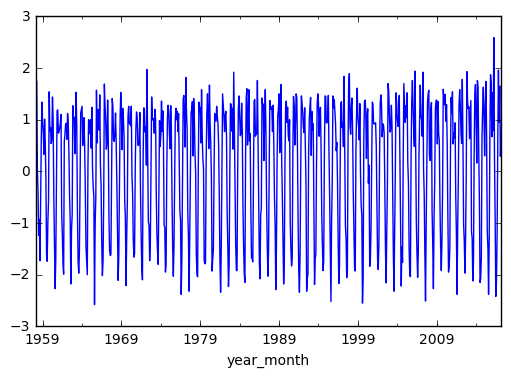

In [194]:
ppm.diff().plot()

In [209]:
from statsmodels import tsa
arima_model = tsa.arima_model.ARIMA(ppm, order=(1, 1, 0))
res = arima_model.fit()

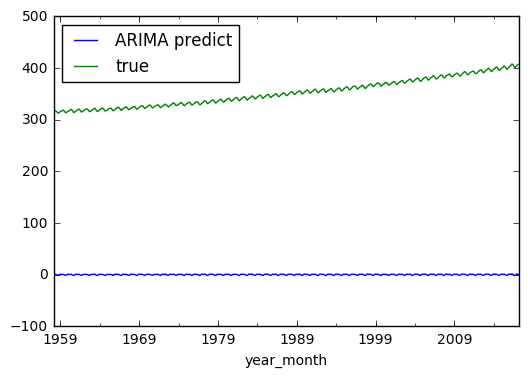

In [210]:
arima_pred = res.predict()
arima_pred.plot(label="ARIMA predict")
ppm.plot(label="true")
plt.legend(loc="best")

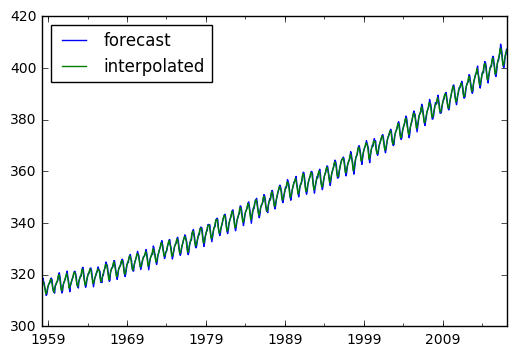

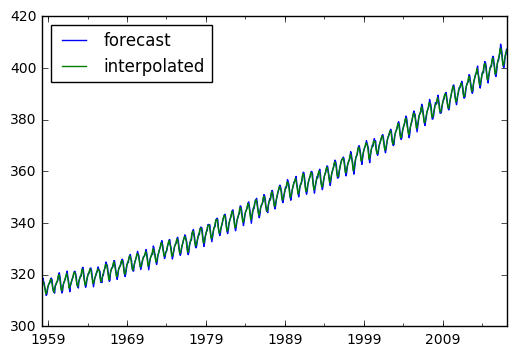

In [211]:
res.plot_predict()

/home/andy/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


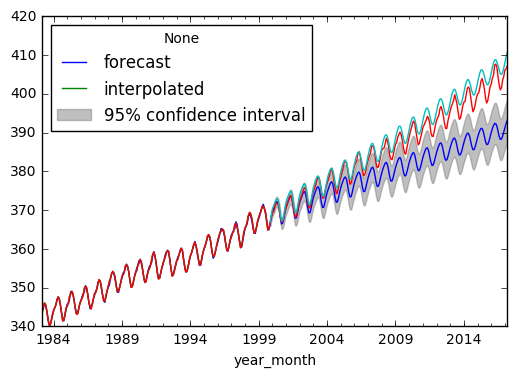

In [227]:
arima_model = tsa.arima_model.ARIMA(ppm[:500], order=(12, 1, 0))
res = arima_model.fit()
res.predict(ppm.index[300], ppm.index[-1])
ppm[300:].plot(label="true")
#plt.legend(loc="best")
ar_pred.plot(label="AR predict")


In [225]:
tsa.arima_model.ARMA._fit_start_params??

In [226]:
sm.__version__

'0.8.0'

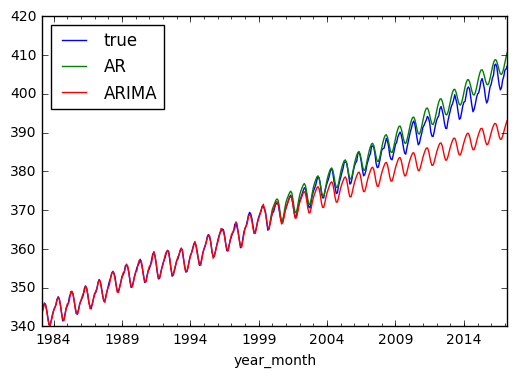

In [231]:
arima_pred = res.predict(ppm.index[300], ppm.index[-1], typ="levels")
ppm[300:].plot(label="true")
ar_pred.plot(label="AR")
arima_pred.plot(label="ARIMA")
plt.legend(loc="best")

# building our own Autoregressive model

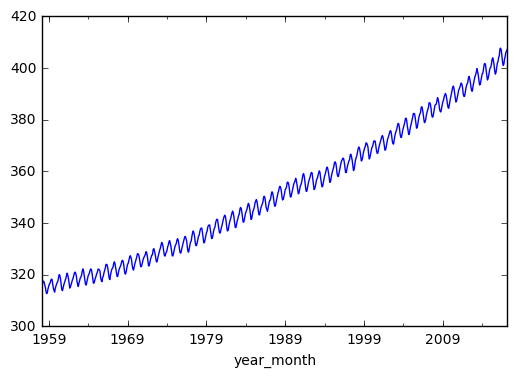

In [232]:
ppm.plot()

In [288]:
ppm.shape

(709,)

In [297]:
train = ppm[:500]
test = ppm[500:]

In [298]:
X = ppm.index.to_series().apply(lambda x: x.toordinal())
X = pd.DataFrame(X)

X_train, X_test = X.iloc[:500, :], X.iloc[500:, :]

In [299]:
X_train.shape

(500, 1)

In [300]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, train)

In [301]:
lr_pred = lr.predict(X_test)

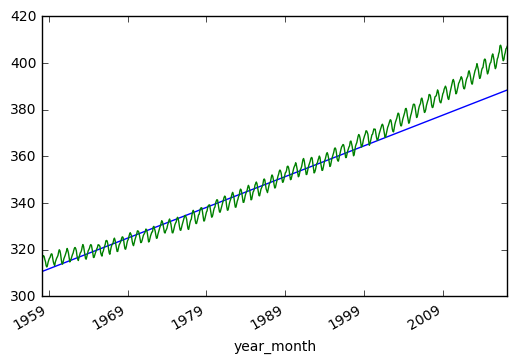

In [302]:
plt.plot(ppm.index, lr.predict(X))
ppm.plot()


In [303]:
from sklearn.preprocessing import PolynomialFeatures
lr_poly = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())
lr_poly.fit(X_train, train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

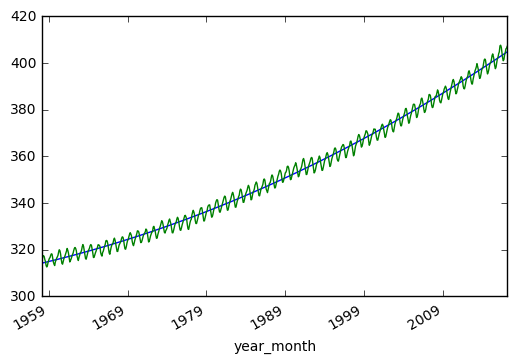

In [304]:
plt.plot(ppm.index, lr_poly.predict(X))
ppm.plot()


In [307]:
y_res = ppm - lr_poly.predict(X)

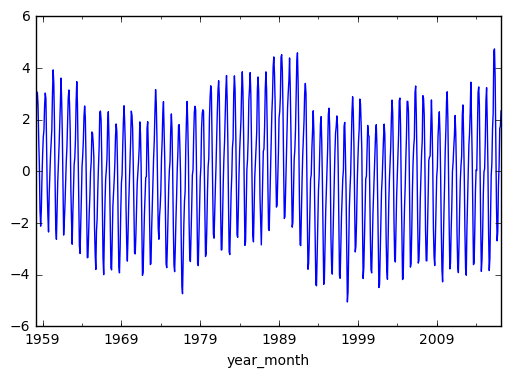

In [308]:
y_res.plot()

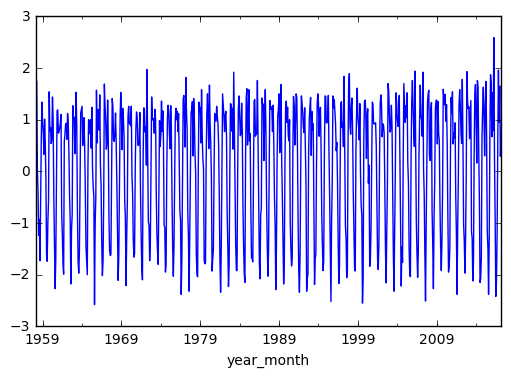

In [311]:
ppm.diff().plot()

In [312]:
(ppm.diff()**2).sum()

1072.1158999999996

In [313]:
(y_res ** 2).sum()

3453.2261737155386

In [327]:
ar_model = tsa.arima_model.ARMA(ppm[:500].diff()[1:], order=(12, 0))
res = ar_model.fit()

/home/andy/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [341]:
ar_pred = res.predict(ppm.index[500], ppm.index[-1])
pred_arma_diff = np.cumsum(ar_pred) + ppm[500]

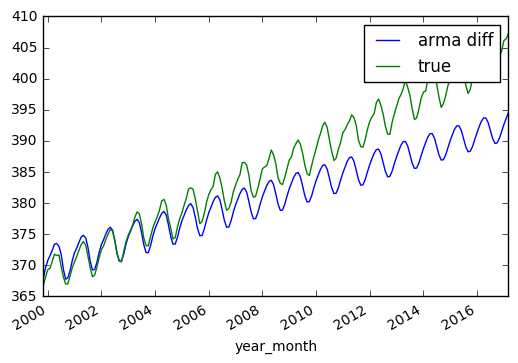

In [342]:
plt.plot(ppm.index[500:], pred_arma_diff, label="arma diff")
ppm[500:].plot(label="true")
plt.legend()

In [352]:
ar_model_res = tsa.arima_model.ARMA(y_res[:500], order=(12, 0))
res_res = ar_model_res.fit()

/home/andy/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [374]:
ar_model_res = tsa.ar_model.AR(y_res[:500])
res_res = ar_model_res.fit(maxlag=12)

In [375]:
arma_pred_res = res_res.predict(ppm.index[500], ppm.index[-1])
pred_arma_res = arma_pred_res + lr_poly.predict(X_test)

In [377]:
res_res.params

const              -0.008039
L1.interpolated     0.922508
L2.interpolated    -0.243015
L3.interpolated    -0.101173
L4.interpolated    -0.077538
L5.interpolated     0.158073
L6.interpolated    -0.006164
L7.interpolated    -0.023890
L8.interpolated    -0.126381
L9.interpolated     0.092664
L10.interpolated   -0.025640
L11.interpolated    0.414180
L12.interpolated   -0.018078
dtype: float64

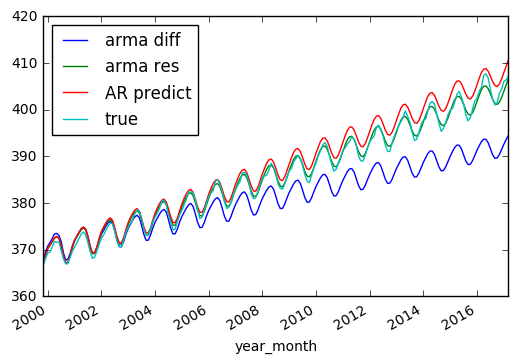

In [376]:
plt.plot(ppm.index[500:], pred_arma_diff, label="arma diff")
plt.plot(ppm.index[500:], pred_arma_res, label="arma res")
ar_pred.plot(label="AR predict")

ppm[500:].plot(label="true")
plt.legend(loc="best")

In [390]:
X_month = pd.concat([X, pd.DataFrame({'month': X.index.month}, index=X.index)], axis=1)

In [391]:
X_month.head()

,year_month,month
year_month,,
1958-03-01,714839,3
1958-04-01,714870,4
1958-05-01,714900,5
1958-06-01,714931,6
1958-07-01,714961,7


In [401]:
X_train_month = X_month[:500]
X_test_month = X_month[500:]
lr_poly_month = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())
lr_poly_month.fit(X_train_month, train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [402]:
X_test_month.shape

(209, 2)

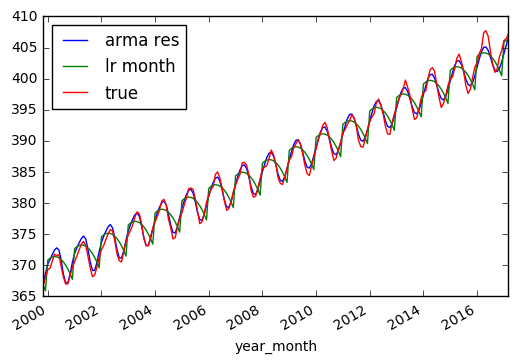

In [403]:
plt.plot(ppm.index[500:], pred_arma_res, label="arma res")
plt.plot(ppm.index[500:], lr_poly_month.predict(X_test_month), label="lr month")

ppm[500:].plot(label="true")
plt.legend(loc="best")

In [404]:
from sklearn.preprocessing import OneHotEncoder

In [408]:
X_train_month = X_month[:500]
X_test_month = X_month[500:]
lr_poly_month_ohe = make_pipeline(OneHotEncoder(categorical_features=[1], sparse=False), PolynomialFeatures(include_bias=False), LinearRegression())
lr_poly_month_ohe.fit(X_train_month, train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(categorical_features=[1], dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

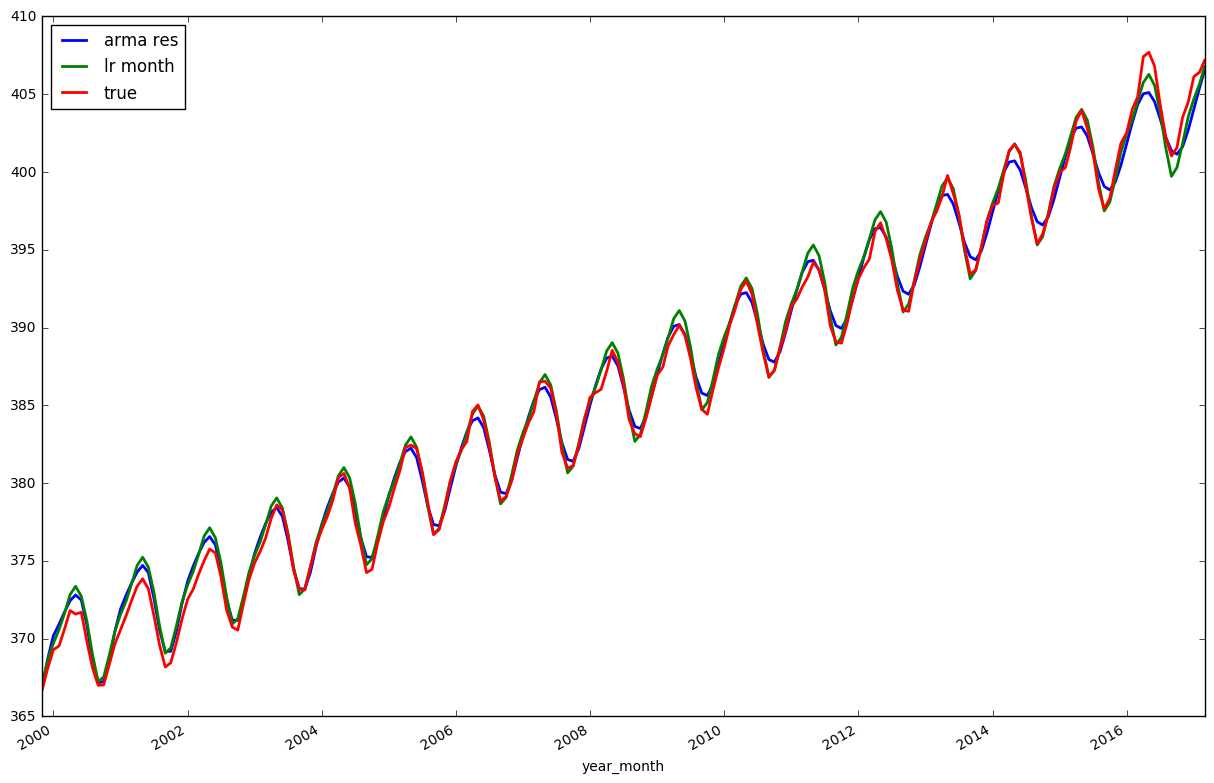

In [426]:
plt.figure(figsize=(15, 10))
plt.plot(ppm.index[500:], pred_arma_res, label="arma res", linewidth=2)
plt.plot(ppm.index[500:], lr_poly_month_ohe.predict(X_test_month), label="lr month", linewidth=2)

ppm[500:].plot(label="true", ax=plt.gca(), linewidth=2)
plt.legend(loc="best")


In [410]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ppm[500:], lr_poly_month_ohe.predict(X_test_month))

0.47156659357427655

In [411]:
mean_squared_error(ppm[500:], pred_arma_res)

0.57735548379046753

# energy data from https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

In [431]:
energy = pd.read_csv("energydata_complete.csv", parse_dates=['date'], index_col="date")

In [432]:
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


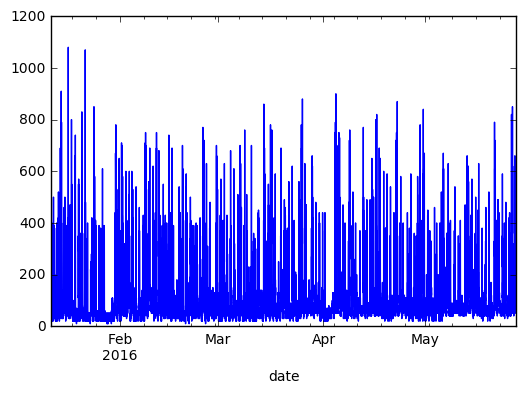

In [433]:
energy.Appliances.plot()

In [442]:
week = energy.Appliances.groupby([energy.index.hour, energy.index.dayofweek]).mean()

In [444]:
week.reorder_levels([1, 0]).head(30)

0  0    53.684211
1  0    66.083333
2  0    52.083333
3  0    49.250000
4  0    49.000000
5  0    49.122807
6  0    50.000000
0  1    52.719298
1  1    56.250000
2  1    52.583333
3  1    49.416667
4  1    48.916667
5  1    48.245614
6  1    51.052632
0  2    50.964912
1  2    49.083333
2  2    49.500000
3  2    48.416667
4  2    49.333333
5  2    47.543860
6  2    48.684211
0  3    50.175439
1  3    47.083333
2  3    48.416667
3  3    46.750000
4  3    48.166667
5  3    47.719298
6  3    49.473684
0  4    50.438596
1  4    48.833333
Name: Appliances, dtype: float64

In [447]:
week.reorder_levels([1, 0]).sort_index().head(30)

0  0      53.684211
   1      52.719298
   2      50.964912
   3      50.175439
   4      50.438596
   5      54.824561
   6      56.228070
   7      71.403509
   8      94.035088
   9      96.052632
   10    151.842105
   11    178.421053
   12    154.561404
   13    177.982456
   14    151.228070
   15    166.052632
   16    144.736842
   17    190.166667
   18    189.083333
   19    144.833333
   20    148.916667
   21    100.000000
   22     76.166667
   23     63.333333
1  0      66.083333
   1      56.250000
   2      49.083333
   3      47.083333
   4      48.833333
   5      59.833333
Name: Appliances, dtype: float64

In [448]:
week_sorted = week.reorder_levels([1, 0]).sort_index()

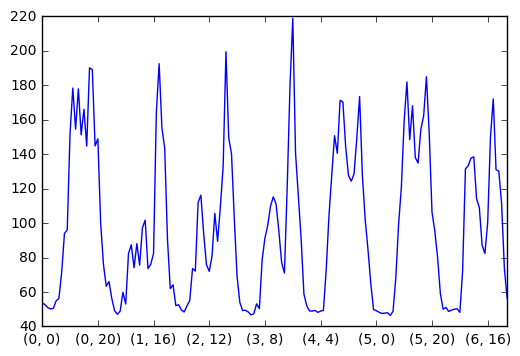

In [449]:
week_sorted.plot()